<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [4]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv'
                      , sep=';')
#Определим размерность таблицы
hh_data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
hh_data.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
#Определим количество пропусков в столбцах
null_data = hh_data.isnull().mean()
#Определим столбцы, в которых число пропусков больше нуля
null_data = null_data[null_data > 0].index
list(null_data)

['Опыт работы',
 'Последнее/нынешнее место работы',
 'Последняя/нынешняя должность']

5. Выведите основную статистическую информацию о столбцах.


In [8]:
stat_info_1 = hh_data['Опыт работы'].value_counts().count()
stat_info_2 = list(hh_data['Ищет работу на должность:']
            .value_counts()
            .nlargest(1)
            .index)
print(f'Сколько уникальных значений содержится в столбце «Опыт работы»? Ответ: {stat_info_1}')
print(f'Какая из искомых должностей самая распространённая? Ответ: {stat_info_2}')

Сколько уникальных значений содержится в столбце «Опыт работы»? Ответ: 44413
Какая из искомых должностей самая распространённая? Ответ: ['Системный администратор']


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
def education_level(col):
    #Создаем список, в которе поместим подходящие категории
    lev = []
    #Список возможных вариантов уровня образования
    education_list_lvl = ['высшее','Высшее' 
                          , 'Неоконченное'
                          , 'среднее', 'Среднее'
                          , 'специальное']
    #Разделеняем данные в колонке на элементы в списке, 
    #В любом из случаем необходимые данные будут не дальше 3 элмента
    education_list_split = col.split(' ')[:2]
    #Проходимся в цикле по элементам списка и сравниванем значения
    #со списком возможных вариантов. Если находится подходящий вариант 
    #добавляем его в список с подходящими категориями
    for ed_lvl in education_list_split:
        if ed_lvl in education_list_lvl:
            lev.append(ed_lvl) 
    #Возвращаем полученный список в качестве строки
    return ' '.join(lev)

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education_level)
hh_data = hh_data.drop(['Образование и ВУЗ'], axis=1)
#
hh_data.groupby('Образование')['Образование'].count()['Среднее']


559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
#создаем функцию, определяющую пол
def gender(col):
    lev = []
    gender_list = col.split(',')
    #определение пола всегда явлется первым элементом
    if gender_list[0] == 'Мужчина ':
        gender_list[0] = 'М'
    if gender_list[0] == 'Женщина ':
        gender_list[0] = 'Ж'
    lev.append(gender_list[0]) 
    return ' '.join(lev)
#создаем функцию, определяющую возраст
def age(col):
    #Возраст всегда является вторым элементом, если разделителем
    #явялется ","
    age_list_1 = col.split(',')[1]
    #Объединяем в строку, чтобы работать только с возрастом
    age_list_2 = ''.join(age_list_1)
    #разделяем новую строку и используем 3-ий элемент в списке,
    #где и будет необходимое значение возраста
    age_list_2 = age_list_2.split(' ')[2]
    return age_list_2

hh_data['Пол'] = hh_data['Пол, возраст'].apply(gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(age).astype('int8')
answer_1 = round(hh_data['Пол'].value_counts(normalize=True), 4)*100
answer_1 = answer_1.loc['Ж']
answer_2 = round(hh_data['Возраст'].mean(), 1)
hh_data = hh_data.drop(['Пол, возраст'], axis=1)
print(f'Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых. Ответ: {answer_1}')
print(f'Чему равен средний возраст соискателей? Ответ округлите до десятых. Ответ: {answer_2}')


Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых. Ответ: 19.07
Чему равен средний возраст соискателей? Ответ округлите до десятых. Ответ: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def get_experience(col):
    #проверяем пустые колонки и даем им соотвествующие названия
    if col is np.nan or col == 'Не указано':
        return None
    #Задаем возможные обозначения лет 
    year_words=['год', 'года', 'лет']
    #Задаем возможные обозначения месяцев
    month_words=['месяц', 'месяца', 'месяцев']
    col_splitted = col.split(' ')[:7]
    years = 0
    months = 0
    #проходим в цикле по элементам и индексам разделенного значения
    #сравниваем данные в заданных значениях с данными в столбце,
    #если находим соотвествие, то добавляем значени лет(месяцев)
    #в соотвествующую переменную
    for index, item in enumerate (col_splitted):
        if item in year_words:
            years = int(col_splitted[index-1])
        if item in month_words:
            months = int(col_splitted[index-1])
    #значение лет умножаем на 12, чтобы получить значение месяцев
    return int(years*12 + months)
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data = hh_data.drop(['Опыт работы'], axis=1)
print(round(hh_data['Опыт работы (месяц)'].median()))




100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
#Создаем функцию, определяющую город
def function_city(col):
    col_split = col.split(' , ')
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    if col_split[0] == 'Москва':
        return 'Москва'
    if col_split[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    for city_mi in million_cities:
        if col_split[0] == city_mi:
            return 'Город-миллионник'  
    else:
        return 'Другие'
#Создаем функцию, определяющую готовность к переезду
def get_ready_to_move(col):
    if ('не готов к переезду' in col) or ('не готова к переезду' in col):
        return False
    elif 'хочу' in col:
        return True
    else:
        return True
#Создаем функцию, определяющую готовность к командиркам 
def get_ready_for_bisiness_trips(col):
    if ('командировка' in col):
        if ('не готов к командировкам' in col) or('не готова к командировкам' in col):
            return False
        else: 
            return True
    else:
        return False

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(function_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
hh_data = hh_data.drop(['Город, переезд, командировки'], axis=1)
print(f'Сколько процентов соискателей живут в Санкт-Петербурге? Ответ:', round((hh_data['Город'].value_counts(normalize=True)['Санкт-Петербург'])*100))
print(f'Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ:',round(hh_data[
    hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']
].shape[0] / hh_data.shape[0] *100))




Сколько процентов соискателей живут в Санкт-Петербурге? Ответ: 11
Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ: 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
#Определяем возможные варианты занятости
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
#Проходим циклом по возможным значениям, если потенциальное значение 
#есть у данного человека, то получаем True
#вместе с этим создаем сразу необходимые столбцы по вариантам занятности
for employment in employments:
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
for chart in charts:
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)

hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)

print(hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])
print(hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
#Импортируем таблицу и оставляем только необходимые столбцы
exchange_rates = pd.read_csv('data/ExchangeRates.csv'
                      , sep=',')
exchange_rates = exchange_rates[['currency', 'date' , 'close' , 'proportion']]

#Приводм стобцы к формату datatime
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date

#Выдеялем сумму желаемой заработной платы
def amount_of_currency(col):
    amount = col.split(' ')[0]
    return float(amount)

#Приводим наименование валют в первой таблице 
# к международным стандартам  
def currency_ISO(col):
    #Создаем список валют, которые необходимо переименовать
    The_name_of_the_currency_in_the_data = ['грн.','бел.руб.','сум']
    #Создаем список, в котором содержатся новые обозначения
    Name_of_the_currency_in_ISO_encoding = ['UAH','BYN','UZS']
    amount = col.split(' ')[1]
    #проверяем, необходимо ли переименовывать валюту
    for cur_data, cur_ISO in zip(The_name_of_the_currency_in_the_data
                                 ,Name_of_the_currency_in_ISO_encoding):
        if amount == cur_data:
            amount = cur_ISO
            return amount
    return amount
    
#Применяем функции и создаем столбцы с желаемой зарпалатой
#и с наименованием валюты 
hh_data['желаемая зарплата в валюте'] = hh_data['ЗП'].apply(amount_of_currency)
hh_data['валюта'] = hh_data['ЗП'].apply(currency_ISO)

#Объединяем таблицы
hh_data = hh_data.merge(exchange_rates, right_on=['currency', 'date'], left_on=['валюта', 'Обновление резюме'], how='left')

#Заполняем значения close
hh_data = hh_data.fillna({'close': 1})
hh_data = hh_data.fillna({'proportion': 1})

#Считаем желаемую ЗП в рублях
hh_data['ЗП (руб)'] = hh_data['желаемая зарплата в валюте']*hh_data['close']/hh_data['proportion']
hh_data['ЗП (руб)'].median()
hh_data = hh_data.drop(['желаемая зарплата в валюте','currency', 'close', 'proportion', 'валюта', 'date'], axis=1)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

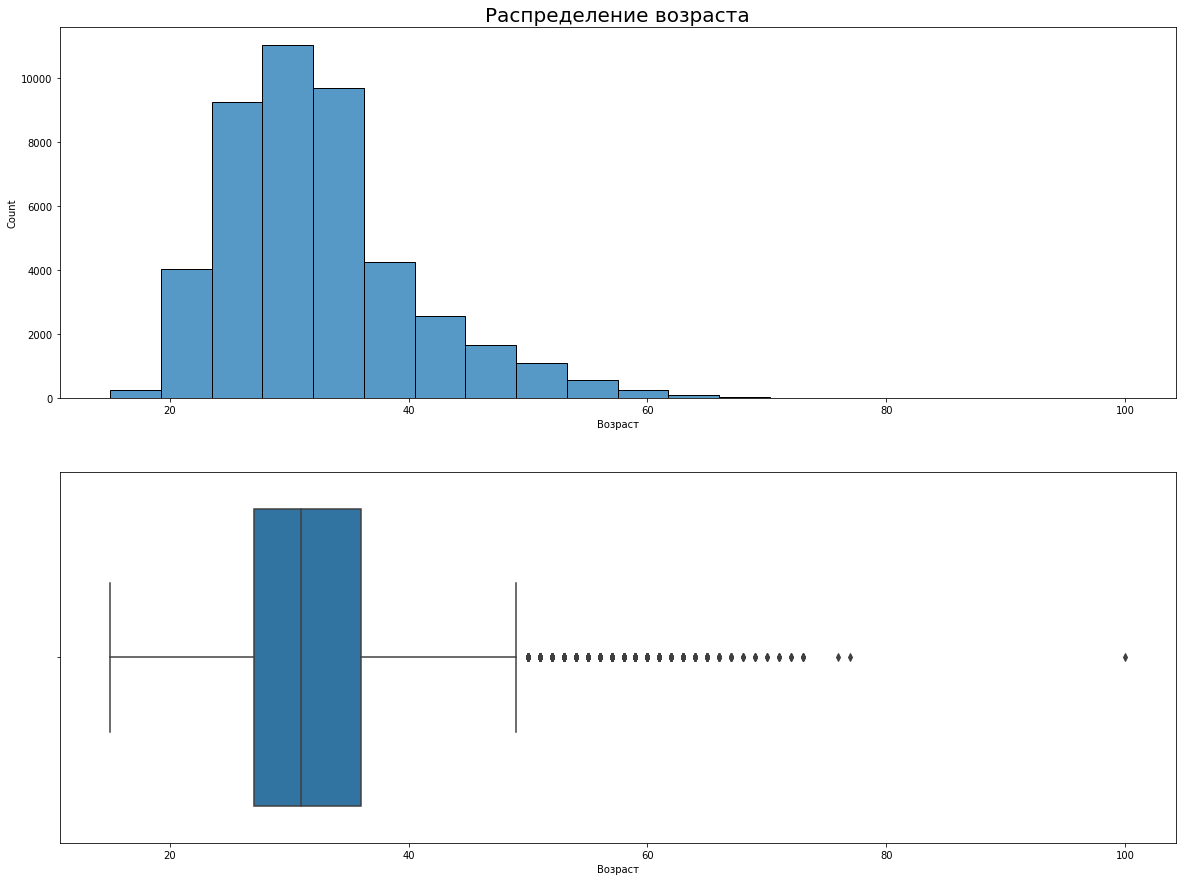

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
sns.histplot(data=hh_data, ax=axes[0], x='Возраст', bins=20);
sns.boxplot(data=hh_data, ax=axes[1], x='Возраст');
axes[0].set_title('Распределение возраста', 
                  fontsize=20);

1. Мода равна 30 лет
2. Возраст находится в интервале от 14 до 100, если смотреть по коробчатой диаграмме то большинство соискателей находится в возрасте от 25 до 35 лет
3. Если соискатели от 14 до 18 выглядят аномальными (при изучении данных идеальным будет выделить их в отдельную группу), однако это можно объяснить желанием найти дополнительные карманые деньги. Но соискатели после 70 лет вызывают вопросы, так как это уже не трудоспособный возраст и вряд ли они будут пользоваться hh для поиска работы. Точно аномальными данными можно назвать возраст в 100 лет. Это видно даже визуально, как этот выброс "сдвигает" график. 

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

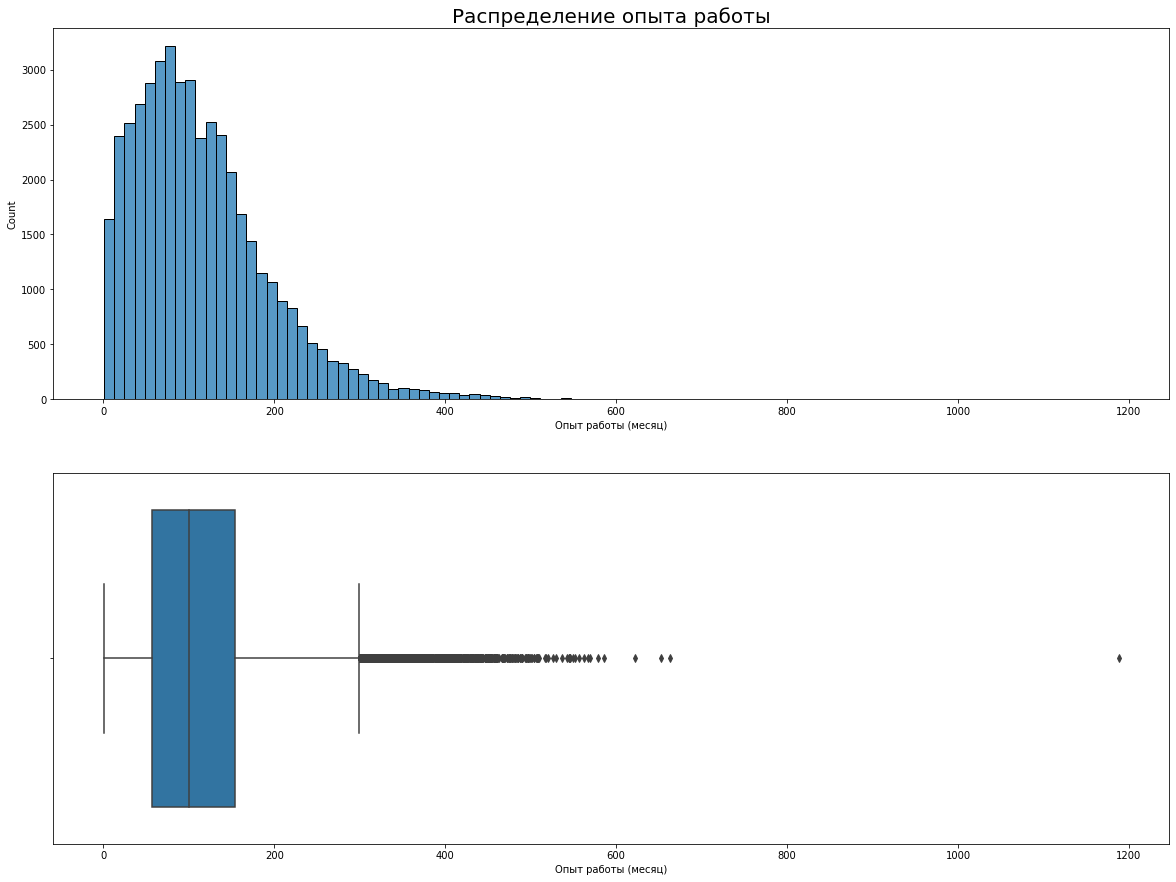

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
sns.histplot(data=hh_data, ax=axes[0], x='Опыт работы (месяц)', bins=100);
sns.boxplot(data=hh_data, ax=axes[1], x='Опыт работы (месяц)');
axes[0].set_title('Распределение опыта работы', 
                  fontsize=20);

In [17]:
hh_data['Опыт работы (месяц)'].max()

1188.0

1. Мода равна 100 (это видно и на графиках и из прошлого задания)
2. Предельные значения признака находятся в рамках от 0 до 1188 месяцев. Примерный интервал большинства соискателей от 50 до 150 месяцев.
3. Аномальными выглядят данные после 600 месяце (50 лет). Такие значения вполне возможны, так как есть соискатели старше 70 лет. Точно выбросными данными является значение 1188. 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


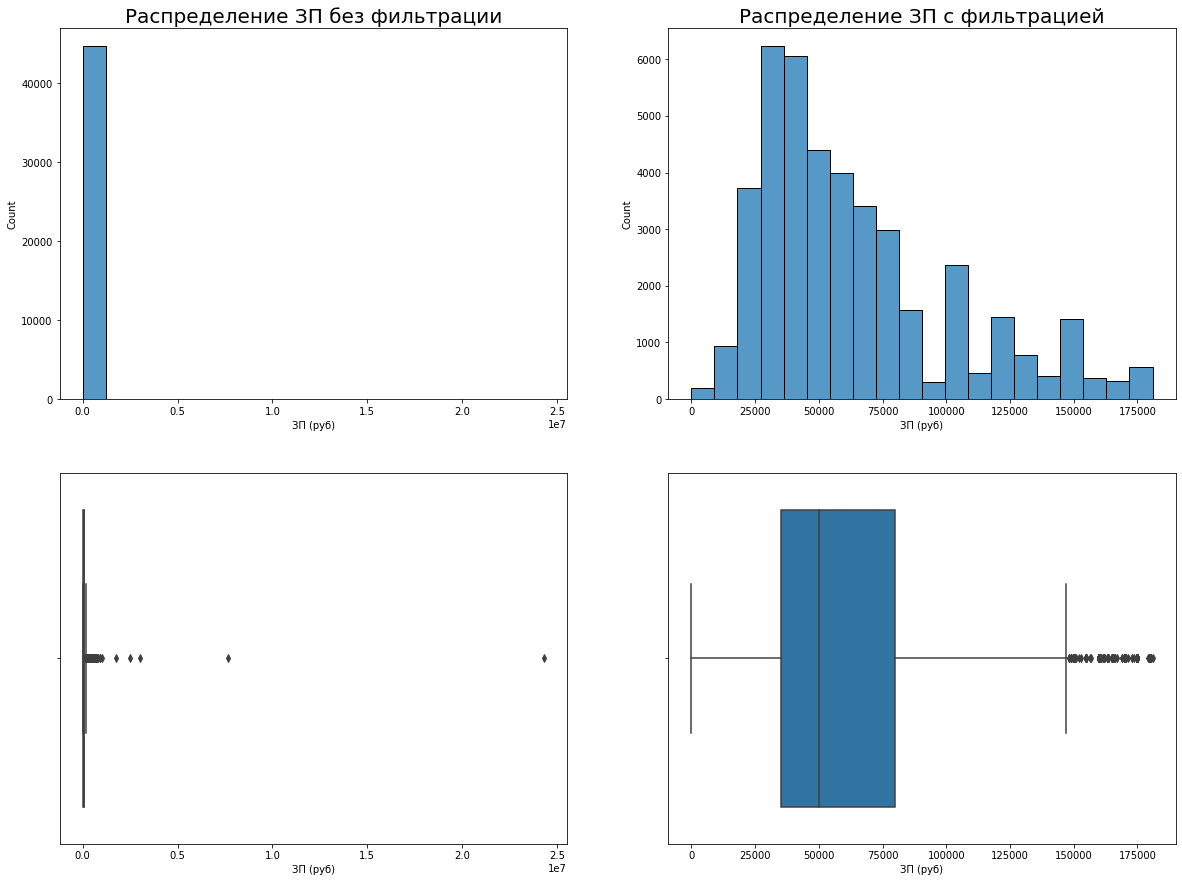

In [18]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return  cleaned


cleaned_1 = outliers_iqr_mod(hh_data, 'ЗП (руб)')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
sns.histplot(data=hh_data, ax=axes[0][0], x='ЗП (руб)', bins=20);
sns.boxplot(data=hh_data, ax=axes[1][0], x='ЗП (руб)');
sns.histplot(data=cleaned_1, ax=axes[0][1], x='ЗП (руб)', bins=20);
sns.boxplot(data=cleaned_1, ax=axes[1][1], x='ЗП (руб)');
axes[0][0].set_title('Распределение ЗП без фильтрации', 
                  fontsize=20);
axes[0][1].set_title('Распределение ЗП с фильтрацией', 
                  fontsize=20);

Построенные изначально графики показали, что с наличием сильных выбросов визуальный анализ не возможен. Поэтому справа были построены графики с отфильтрованными данными (метод Тьюки)
Анализ проводится с отфильтрованными данными
1. Мода равна 50 тыс.руб.
2. Распределение данных от 0 до 200 тыс. рублей. Большинство данных находится в пределах от 35 тыс. руб. до 80 тыс.руб. 
3. В изначальных данных аномальными признаками явяляются те, которые больше 500 тыс. руб. В отредактированных графиках аномальными можно назвать те, которые свыше 100 тыс. руб., однако их лучше выделить в отдельную группу

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

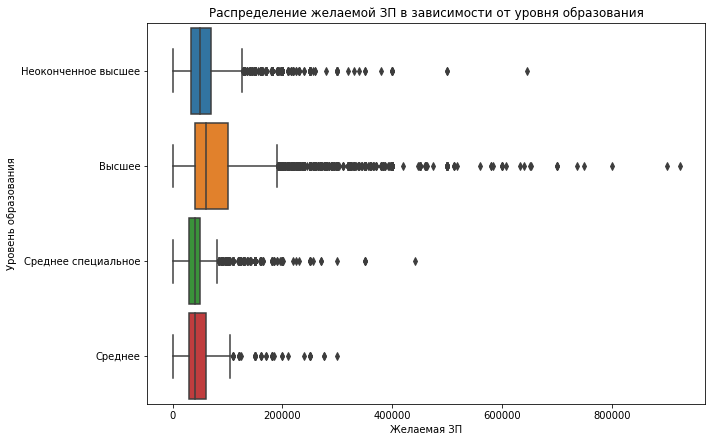

In [19]:
mask_1 = hh_data['ЗП (руб)'] < 1e6
hh_data_mask_1 = hh_data[mask_1]

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=hh_data_mask_1,
    y='Образование',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение желаемой ЗП в зависимости от уровня образования');
boxplot.set_xlabel('Желаемая ЗП');
boxplot.set_ylabel('Уровень образования');

1. Наименьший уровень зарплаты у соискателей со среднем или средне специальным образованием. Наибольший уровень у соискателей с высшим образованием. 
2. График показывает, что уровень образования влияет на желаемый уровень ЗП. Однако "хвосты", которые находятся в правой части графика заставляют задуматься, что для более точного прогнозирования необхоимо уточнять данные хотя бы по сферам деятельности (юридической, математическое, гуманитарное и т.д.).

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

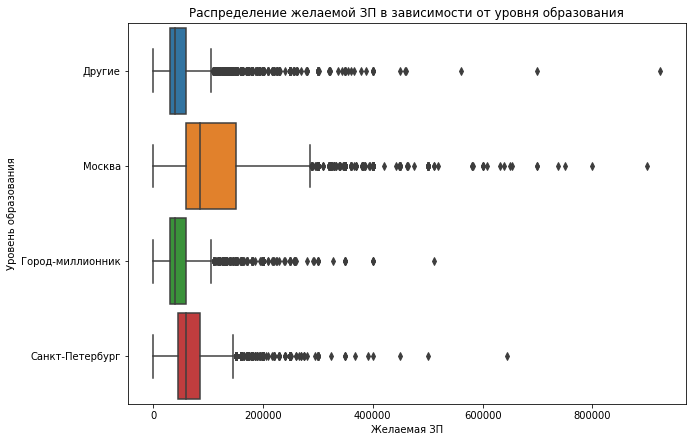

In [20]:
hh_data_mask_1 = hh_data[mask_1]

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=hh_data_mask_1,
    y='Город',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение желаемой ЗП в зависимости от уровня образования');
boxplot.set_xlabel('Желаемая ЗП');
boxplot.set_ylabel('Уровень образования');

1. Исходя из построенных графиков видно, что чем выше мединный уровень желаемой ЗП, тем сильнее размах
2. Безусловно важен, так как эти города отличаются и уровнем жизни, и качеством рабочей силы (их человеческого капитала). Грфик же показывает, как сильно по размаху и мединному значению отличаются Москва, Санкт-Петербург и остальные (миллионики и другие: они по распределению похожи, так что их в идее можно и объединить) 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:


bar_data = hh_data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п и готовности к командировкам/переезду'
)
fig.show()
fig.write_html("plotly/Медианная зп и готовности к командировкам и к переезду.html")

FileNotFoundError: [Errno 2] No such file or directory: 'plotly/Медианная з/п и готовности к командировкам/переезду.html'

Анализ графика показал, что любая готовность к мобильности повышает желаемую ЗП. Такая разница может доходить до 1/3 желаемой ЗП. Если же сравнивать, то показатель готовности к командировками больше оказывает влияние на желаемую ЗП, нежели готовность к переезду

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

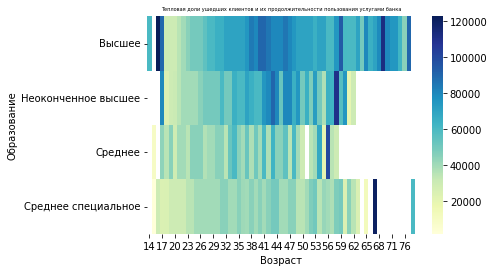

In [22]:
heatmap_data = hh_data.pivot_table(values='ЗП (руб)',
                    index='Образование',
                    columns='Возраст',
                    aggfunc='median')
heatmap = sns.heatmap(data=heatmap_data, cmap='YlGnBu')
heatmap.set_title('Тепловая доли ушедших клиентов и их продолжительности пользования услугами банка', 
                  fontsize=5);

Данные по группе "Среднее специальное" показывают, что рост по зарплатам не такой быстрый, как в других группах. В группе "Высшее" рост желаемой ЗП идет до 40 лет, а потом может снижаться или держаться на высоком уровне. Аналогичная ситуация (но темп немного медленее) и с "Неоконченным высшим". У соискателей с уровнем "Среднее" значительный рост практически отсутсвует.
Также в данных наблюдаются вбросы. Например, видно, что указано высшее образование до 20 лет, что очень сложно представить. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

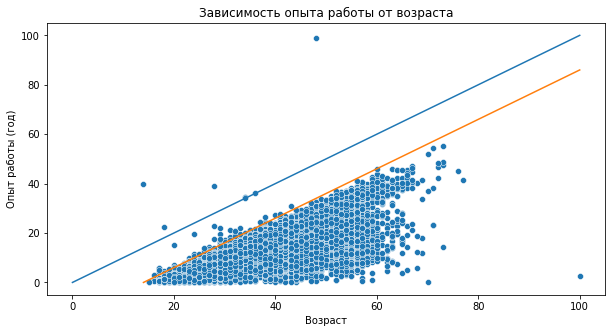

In [23]:
fig = plt.figure(figsize=(10, 5))
scatter_data = hh_data.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
sns.lineplot(x=[14, 100], y=[0, 86])
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');


Я бы передложил немегого передвинуть прямую, чтобы более точно видить вбросы. Например, считать, что опыт можно получать только с 14 лет (оранжевая линия). Тогда мы увидим, что выбросов еще больше, потому что мало видов трудовой деятельности, где опыт работы можно получать раньше 14 лет. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


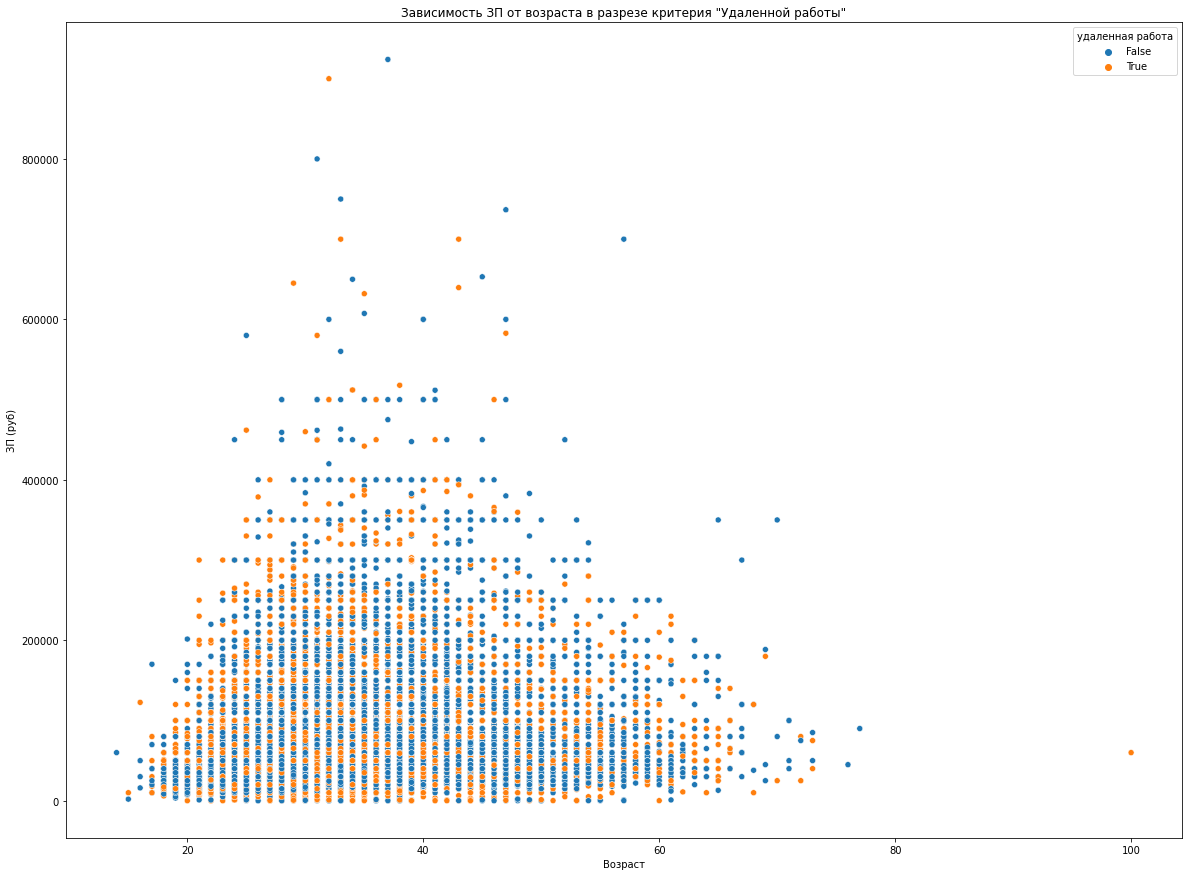

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))

ax = sns.scatterplot(data=hh_data_mask_1, x='Возраст'
                , y='ЗП (руб)', hue='удаленная работа');
ax.set_title('Зависимость ЗП от возраста в разрезе критерия "Удаленной работы"');

Интерес сопоставления таких критериев следующий: 
1. Выявить зависимость ЗП от готовности к удаленной работе
2. Понять, влияет ли возраст на готовность к удаленной работе

Как оказалось, нет никакой зависимости между этими критериями, что исследователя немного удивило

In [25]:
bar_data_1 = hh_data.groupby(
    ['Образование', 'Пол'],
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=bar_data_1,
    y='Образование',
    x='ЗП (руб)',
    barmode="group",
    color='Пол',
    orientation='h',
    title='Зависимость желаемой зарплаты в разрезе пола и уровня образования'
)
fig.show()

Во время работы возник интересный вопрос: влияет ли пол на желаемый уровень зарплаты? И сглаживает ли неравенство в желаемой ЗП между полами уровень образования?

Пол напрямую влияет на желаемый уровень ЗП. Такая разнца может доходить до 30%

При этом уровень образования никак не влияет на такую диспропорцию 



# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [26]:
#создаем таблицу с дупликатами, чтобы посчитать их
duplicates = hh_data[hh_data.duplicated()]
#удаляем дубликаты
data = hh_data.drop_duplicates()
print(duplicates.shape[0])

161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [27]:
null_data = hh_data.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                170
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [28]:
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(hh_data['Опыт работы (месяц)'].median())
print(round(hh_data['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [29]:
outliers = hh_data[(hh_data['ЗП (руб)'] > 1e6) 
                   | (hh_data['ЗП (руб)'] < 1e3)].index
data = hh_data.drop(outliers)
print(outliers.shape[0])

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [30]:
outliers = hh_data[hh_data['Опыт работы (месяц)']/12 
                   >= hh_data['Возраст']].index
hh_data = hh_data.drop(outliers)
print(outliers.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Ассиметрия равна 0.45244697379518917


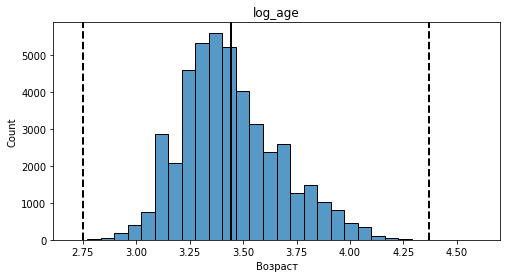

In [31]:
#изначально данные находили в виде int8,
#что не позволяло нормально обрабатывать данные
hh_data['Возраст'] = hh_data['Возраст'].astype('int64')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('log_age');
print(f'Ассиметрия равна', log_age.skew())

In [32]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(hh_data,'Возраст', right=4, log_scale=True)
print(f'Сколько выбросов вы нашли с помощью метода z-отклонений:', outliers_2.shape[0])
print(outliers['Возраст'])

NameError: name 'outliers_2' is not defined

1. Ассимерития правостороняя
2. Соискатели в возрасте 15 и 100 лет попадают в аномальные значения